In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmos_cat=os.path.abspath('../lephare_cosmos/COSMOS2020.in')
cosmos_cat

'/home/joseph/PhotoZ_PhD/lephare_cosmos/COSMOS2020.in'

In [3]:
cosmos_cat_arr = np.loadtxt(cosmos_cat)
cosmos_cat_arr.shape

(18420, 64)

In [4]:
cosmos_filt_dir = os.path.abspath('../LEPHARE/filt')
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb",\
                                                                      "vista/Y.lowres",\
                                                                      "vista/J.lowres",\
                                                                      "vista/H.lowres",\
                                                                      "vista/K.lowres",\
                                                                      "cosmos/IB427.lowres",\
                                                                      "cosmos/IB464.lowres",\
                                                                      "cosmos/IB484.lowres",\
                                                                      "cosmos/IB505.lowres",\
                                                                      "cosmos/IB527.lowres",\
                                                                      "cosmos/IB574.lowres",\
                                                                      "cosmos/IB624.lowres",\
                                                                      "cosmos/IB679.lowres",\
                                                                      "cosmos/IB709.lowres",\
                                                                      "cosmos/IB738.lowres",\
                                                                      "cosmos/IB767.lowres",\
                                                                      "cosmos/IB827.lowres",\
                                                                      "cosmos/NB711.lowres",\
                                                                      "cosmos/NB816.lowres",\
                                                                      "vista/NB118.lowres",\
                                                                      "cosmos/irac_ch1.lowres",\
                                                                      "cosmos/irac_ch2.lowres",\
                                                                      "cosmos/irac_ch3.lowres",\
                                                                      "cosmos/irac_ch4.lowres"]
                   ]
N_FILT=len(cosmos_filt_list)
N_FILT

30

In [5]:
1+2*N_FILT+1

62

In [6]:
cosmos_filt_list

['/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_cfht.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_new.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/rHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/iHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/zHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/yHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/Y.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/J.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/H.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/K.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB427.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB464.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB484.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB505.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB527.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/IB574.lowres',
 '/home/joseph/PhotoZ_PhD/

In [7]:
filt_trans_type = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
assert len(filt_trans_type)==N_FILT
print(len(filt_trans_type))

30


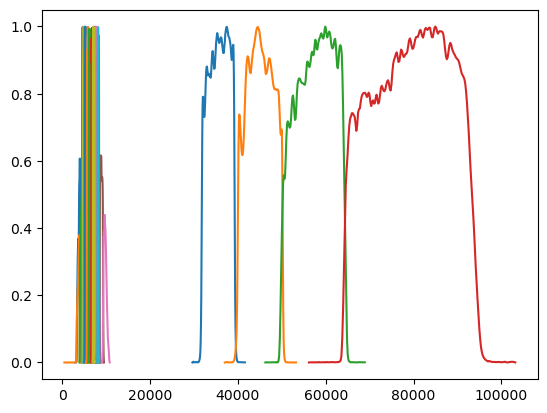

In [8]:
for filt in cosmos_filt_list[:7]+cosmos_filt_list[12:-5]+cosmos_filt_list[-4:]:
    x, y = np.loadtxt(filt, unpack=True)
    plt.plot(x, y)

In [9]:
filt_dict = {}
for filt, trans_typ in zip(cosmos_filt_list, filt_trans_type):
    folder, file = filt.split('/')[-2:]
    name=folder+"_"+file.split('.')[0]
    if trans_typ == 1:
        transm = "photons"
    else:
        transm = "energy"
    filt_dict[name] = {"path" : filt, "transmission" : transm}
filt_dict

{'cosmos_u_cfht': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_cfht.lowres',
  'transmission': 'photons'},
 'cosmos_u_new': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_new.pb',
  'transmission': 'photons'},
 'hsc_gHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb',
  'transmission': 'photons'},
 'hsc_rHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/rHSC.pb',
  'transmission': 'photons'},
 'hsc_iHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/iHSC.pb',
  'transmission': 'photons'},
 'hsc_zHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/zHSC.pb',
  'transmission': 'photons'},
 'hsc_yHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/yHSC.pb',
  'transmission': 'photons'},
 'vista_Y': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/Y.lowres',
  'transmission': 'photons'},
 'vista_J': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/J.lowres',
  'transmission': 'photons'},
 'vista_H': {'path': '/home/joseph/Pho

In [10]:
len(filt_dict.keys())

30

In [11]:
_sel = [0]+[1+i for i in range(2*N_FILT)]+[2*N_FILT+2]
_sel

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62]

In [12]:
cosmos_inp_for_emu_all = cosmos_cat_arr[:, _sel]
_rand_sel = np.random.choice(np.arange(cosmos_inp_for_emu_all.shape[0]), size=100)
cosmos_inp_for_emu = cosmos_inp_for_emu_all[_rand_sel, :]
cosmos_inp_for_emu.shape

(100, 62)

(array([29., 36., 20.,  3.,  2.,  5.,  3.,  1.,  0.,  1.]),
 array([0.0785 , 0.52267, 0.96684, 1.41101, 1.85518, 2.29935, 2.74352,
        3.18769, 3.63186, 4.07603, 4.5202 ]),
 <BarContainer object of 10 artists>)

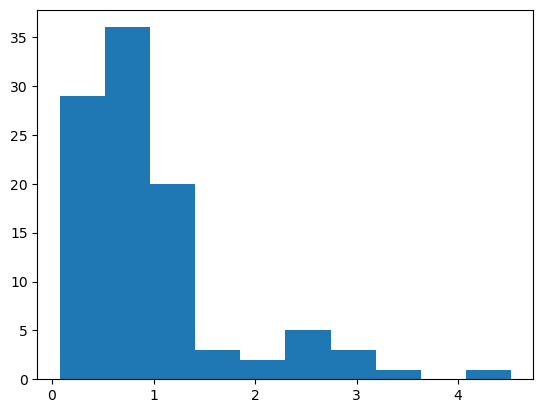

In [13]:
import matplotlib.pyplot as plt
plt.hist(cosmos_inp_for_emu[:,-1])

In [14]:
np.savetxt("COSMOS2020_emu.inp", cosmos_inp_for_emu)

In [15]:
gal_test = cosmos_inp_for_emu[3, 1:-1]
gal_test = [gal_test[2*k] for k in range(len(gal_test)//2)]
gal_test

[2.205111996809225e-29,
 2.2905500107241654e-29,
 2.630739655716543e-29,
 3.6501698846140565e-29,
 5.175023112523328e-29,
 6.392825329398942e-29,
 5.729125194585688e-29,
 5.672967484819787e-29,
 6.369369910088736e-29,
 6.690321320496008e-29,
 7.183249247140445e-29,
 2.2812465653865599e-29,
 2.3710686278006886e-29,
 2.4546530846074332e-29,
 2.566957068930191e-29,
 2.487287666588521e-29,
 2.6083681738531624e-29,
 2.8762511864959516e-29,
 5.021506935729667e-29,
 4.4852154926811357e-29,
 4.7818192365461534e-29,
 4.611670247270279e-29,
 4.876982444363865e-29,
 4.6888019359836647e-29,
 5.002066779426955e-29,
 5.845689697057295e-29,
 6.904383618989788e-29,
 4.528087596022857e-29,
 -99.0,
 -99.0]

In [16]:
mags_test = -2.5*np.log10(gal_test) - 48.6

/tmp/ipykernel_3853/1570034773.py:1: RuntimeWarning: invalid value encountered in log10
  mags_test = -2.5*np.log10(gal_test) - 48.6


In [17]:
mags_test

array([23.04142337, 23.00015055, 22.84980532, 22.49421731, 22.11521927,
       21.8857679 , 22.00477922, 22.01547426, 21.88975882, 21.83638256,
       21.75919766, 23.00456943, 22.96263969, 22.92502469, 22.87645349,
       22.91068496, 22.85907777, 22.75293297, 22.14791483, 22.27054172,
       22.20101711, 22.24035439, 22.17962202, 22.22234528, 22.15212629,
       21.9829106 , 21.80218772, 22.26021295,         nan,         nan])

In [18]:
missing_filts = np.where(np.isnan(mags_test))[0]
missing_filts

array([28, 29])

In [19]:
check = np.where(np.array(gal_test)<=0.)[0]
check

array([28, 29])

In [20]:
sed_file=os.path.abspath("../lephare_cosmos/SED_FORS2_KinCalClus_SL_v5.list")
sed_list = []
with open(sed_file, 'r') as seds:
    for sed in seds:
        if sed[0] == "#":
            pass
        else:
            sed_list.append(os.path.abspath(os.path.join('../LEPHARE/sed/GAL', sed[:-1])))
sed_list

['/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id226.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id227.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id451.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id714.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE

In [21]:
sed_dict = {}
for sed in sed_list:
    file = sed.split('/')[-1]
    attrs = file.split("_")
    if attrs[0] == "AVG":
        name="_".join(attrs[:4])
    else:
        name="_".join(attrs[2:4])+"-"+(attrs[-1]).split('.')[0]
    sed_dict[name] = sed
sed_dict

{'AVG_CLUST_CWW_Sbc': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
 'AVG_CLUST_CWW_E': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
 'AVG_CLUST_CWW_Im': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
 'AVG_CLUST_CWW_Scd': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
 'AVG_CLUST_KIN_Sb': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
 'AVG_CLUST_KIN_Sa': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
 'CWW_Sbc-id226': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id226.sed',
 'CWW_Sbc-id227': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id227.sed',
 'CWW_Sbc-id451': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5

In [22]:
cosmo_dict = {"h0": 70.0, "om0": 0.3, "l0": 0.7}
z_grid_dict = {"z_min": 0.01, "z_max": 6., "z_step": 0.1}
wl_grid_dict = {"lambda_min": 100., "lambda_max": 100000., "lambda_step": 10.}
extinc_dict = {"Calzetti":os.path.abspath('../LEPHARE/ext/SB_calzetti.dat')}
ebv_list = [0., 0.05, 0.1, 0.15, 0.25, 0.4] #[0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
estimator = "chi2"
data_inp_dict = {"path": os.path.abspath("COSMOS2020_emu.inp"), "type": "F"}
data_inp_dict

{'path': '/home/joseph/PhotoZ_PhD/EmuLP/COSMOS2020_emu.inp', 'type': 'F'}

In [23]:
run_opt_dict = {"Cosmology" : cosmo_dict,\
                "Z_GRID" : z_grid_dict,\
                "WL_GRID" : wl_grid_dict,\
                "Templates" : sed_dict,\
                "Filters" : filt_dict,\
                "Dataset" : data_inp_dict,\
                "Extinctions" : extinc_dict,\
                "e_BV": ebv_list,\
                "Estimator" : estimator,\
                "save results" : True,\
                "run name" : "COSMOS2020-with-FORS2"
               }
run_opt_dict

{'Cosmology': {'h0': 70.0, 'om0': 0.3, 'l0': 0.7},
 'Z_GRID': {'z_min': 0.01, 'z_max': 6.0, 'z_step': 0.1},
 'WL_GRID': {'lambda_min': 100.0, 'lambda_max': 100000.0, 'lambda_step': 10.0},
 'Templates': {'AVG_CLUST_CWW_Sbc': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
  'AVG_CLUST_CWW_E': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
  'AVG_CLUST_CWW_Im': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
  'AVG_CLUST_CWW_Scd': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
  'AVG_CLUST_KIN_Sb': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
  'AVG_CLUST_KIN_Sa': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
  'CWW_Sbc-id226': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id226

In [24]:
import json
with open("COSMOS2020-with-FORS2.json", "w") as wf:
    json.dump(run_opt_dict, wf)